In [9]:
import pymongo
from pymongo import MongoClient
import pandas as pd
import numpy as np
import json
import re
from textblob import TextBlob
import matplotlib.pyplot as plt 
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.text import Text
import string, re
import math 
import datetime
import matplotlib.dates as mdates

## Things to do

-Add ID to dataframe and delete tweets generated by airlines\
-other words analysis :cancel, worst/bad\
-Sample tweets in a way to equally represent the each country using 'location' information

In [3]:
pd.set_option('max_colwidth', 1000)
pd.options.display.max_rows = 1000

In [4]:
data = pd.read_csv("en_twitter.csv")

In [5]:
# Convert timestamp into Year-Month

df_time = data[['timestamp_ms']] / 1000
lst_time = list(df_time['timestamp_ms'].values.astype(int))

tweet_day = []

for time in lst_time:
    tweet_daytime = datetime.datetime.fromtimestamp(time)
    tweet_day.append(tweet_daytime.strftime('%Y-%m-%d'))
    
data['date'] = tweet_day
data.drop(['Unnamed: 0', 'timestamp_ms'], inplace=True, axis=1)

In [30]:
# Data
data


,_id,text,date
0,5eb824964a4023111c781d4d,@easyJet It is impossible to get in contact with you by using that e-mail address. So there is no claim yet which I can follow on that damage luggage website. So what to do?,2019-05-22
1,5eb824964a4023111c781d4e,"So @AmericanAir @EWRairport lied to an old lady causing her to miss her flight #934 to LHR. She arrived at 6:05am for a flight departing at 8:30am,mum has no medication,is in a wheelchair and they just ignore the fact they caused this.Worse airline company. Zero customer service",2019-05-22
2,5eb824964a4023111c781d51,"@AmericanAir, I should be on a flight to LA, instead I witnessed an employee in the Wilkes Barre,PA airport who felt the need to scream at a family for being late. They asked for help POLITELY &amp; security was called. I have to wonder was security callee cause they are POC?",2019-05-22
3,5eb824964a4023111c781d52,@Ryanair can I add luggage fees to a flight that’s already booked or do I need to pay excess rate at the airport? Still weeks to the flight in question,2019-05-22
4,5eb824964a4023111c781d54,@goody_tracy @Raoulkitty @JonesDay @Macys @AmericanAir @DeutscheBank @WellsFargo @GoldmanSachs @Starbucks @ToyotaMotorCorp @united @verizon @Citi @Abercrombie Outstanding! Thank you Tracy. This is just what we need. Go to the source of Jones Day money!!,2019-05-22
5,5eb824964a4023111c781d57,Do you remember when you joined Twitter? I do! #MyTwitterAnniversary Meh. Sure let’s fly Full throttle into this Jovian Sh*tstorm. @NasaJuno #JunoMission @KLM #Wintje https://t.co/2PaxhMimlu,2019-05-22
6,5eb824964a4023111c781d59,"@MargrietKuijer I am sorry to hear about this Margriet. If you call baggage service they should be able to provide you with an update on this. For contact details, please see: https://t.co/oHMxtqdpDh Thanks, Lauren",2019-05-22
7,5eb824964a4023111c781d5b,"@AmericanAir flight delays this morning due to mechanical problems. A hassle, but glad to be on the ground while they fix the problems. #beingproductive",2019-05-22
8,5eb824964a4023111c781d5d,"@AmericanAir started out being charged for my luggage when I used my AAdvantage card so it should have been free. Now in Philly, only to find the plane needs a 4 hour repair. Mysteriously now they say 2 hours. Closing my account and won't be flying AA again",2019-05-22
9,5eb824964a4023111c781d5e,Ice Agency ice sculpture cruise ships are amazing!!!. We also do Live Ice Carving Stage Shows - highly interactive spectacle! https://t.co/Zqz6J0NRaf Available in UK &amp; overseas! @virginvoyages #virginvoyages @celebritycruisesuk #celebritycruises @virginatlantic @virginhotels https://t.co/LlADlBffuk,2019-05-22


In [6]:
# Text  
text = data[["text"]]
text

,text
0,@easyJet It is impossible to get in contact with you by using that e-mail address. So there is no claim yet which I can follow on that damage luggage website. So what to do?
1,"So @AmericanAir @EWRairport lied to an old lady causing her to miss her flight #934 to LHR. She arrived at 6:05am for a flight departing at 8:30am,mum has no medication,is in a wheelchair and they just ignore the fact they caused this.Worse airline company. Zero customer service"
2,"@AmericanAir, I should be on a flight to LA, instead I witnessed an employee in the Wilkes Barre,PA airport who felt the need to scream at a family for being late. They asked for help POLITELY &amp; security was called. I have to wonder was security callee cause they are POC?"
3,@Ryanair can I add luggage fees to a flight that’s already booked or do I need to pay excess rate at the airport? Still weeks to the flight in question
4,@goody_tracy @Raoulkitty @JonesDay @Macys @AmericanAir @DeutscheBank @WellsFargo @GoldmanSachs @Starbucks @ToyotaMotorCorp @united @verizon @Citi @Abercrombie Outstanding! Thank you Tracy. This is just what we need. Go to the source of Jones Day money!!
5,Do you remember when you joined Twitter? I do! #MyTwitterAnniversary Meh. Sure let’s fly Full throttle into this Jovian Sh*tstorm. @NasaJuno #JunoMission @KLM #Wintje https://t.co/2PaxhMimlu
6,"@MargrietKuijer I am sorry to hear about this Margriet. If you call baggage service they should be able to provide you with an update on this. For contact details, please see: https://t.co/oHMxtqdpDh Thanks, Lauren"
7,"@AmericanAir flight delays this morning due to mechanical problems. A hassle, but glad to be on the ground while they fix the problems. #beingproductive"
8,"@AmericanAir started out being charged for my luggage when I used my AAdvantage card so it should have been free. Now in Philly, only to find the plane needs a 4 hour repair. Mysteriously now they say 2 hours. Closing my account and won't be flying AA again"
9,Ice Agency ice sculpture cruise ships are amazing!!!. We also do Live Ice Carving Stage Shows - highly interactive spectacle! https://t.co/Zqz6J0NRaf Available in UK &amp; overseas! @virginvoyages #virginvoyages @celebritycruisesuk #celebritycruises @virginatlantic @virginhotels https://t.co/LlADlBffuk


## Analysis of Word Frequency per airline
-Assumption : Twitter users tend to send complaining tweet to airlines when their flights are delayed or cancelled.\
-Method : Count how frequently tweets that users directed to airlines contain certain words(such as delay, cancle, cancellation)\
         and compare per each airline using a plot.
  
# Data preprocessing
Used dataset : Enlighs tweets(18% data loss)
1. Make text all lower case
2. Lemmatize and Tokenize text
3. Divide tweets per each airline

# Make results
'delay tweets' : The tweets containing 'delay' in their texts.\
'received tweets' : The tweets users directed to airlines.

1. Procedure      : Count the 'delay tweets' from 'received tweets' per each airline 
2. Standarization : ('delay tweets' / 'received tweets') per each airline
3. Make a plot

## Assessment of Word Frequency Analysis
Calculate the percentage of 'delay tweets' that 'delay' is used for complaining.\
Since there are lots of tweets and no algorithm is perfect to detect complaining, sampled tweets will be assessed manually.\
Sample size = 50

In [10]:
# Make text all lower case
clean_text = text[['text']].copy()
clean_text["text"] = text["text"].str.lower()

In [ ]:
# Tokenize and Lemmatize text
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

clean_text['text_lemmatized'] = clean_text.text.apply(lemmatize_text)

In [ ]:
clean_text[['text_lemmatized']]

In [7]:
# The number of how many direct tweets each airline had from users.

airlines = {'KLM':56377143, 
            'AirFrance': 106062176, 
            'British_Airways': 18332190, 
            'AmericanAir': 22536055, 
           'Lufthansa': 124476322, 
           'AirBerlin': 26223583, 
           'AirBerlinAssist': 2182373406, 
           'easyJet': 38676903, 
           'RyanAir': 1542862735, 
           'SingaporeAir': 253340062, 
           'Qantas': 218730857, 
           'EtihadAirways': 45621423, 
           'VirginAtlantic': 20626359}

list(airlines.keys())
airline_names = ["@" + s for s in list(airlines.keys())]

airline_lst = []
for i in airline_names:
    # Delete case sensitivity using case=False
    airline_lst.append(data['text'].str.contains(i,case=False).sum())

airline_df = pd.DataFrame(columns=['airline', 'received tweets'])
airline_df['airline'] = list(airlines.keys())
airline_df['received tweets'] = airline_lst
airline_df

,airline,received tweets
0,KLM,44514
1,AirFrance,19442
2,British_Airways,194333
3,AmericanAir,265358
4,Lufthansa,35309
5,AirBerlin,101
6,AirBerlinAssist,1
7,easyJet,109226
8,RyanAir,89792
9,SingaporeAir,20415


In [8]:
# DIvide dataset per airline and count words

words_count = []

for i in airline_names:
    count = 0
    # Delete case sensitivity using case=False
    count += data[data['text'].str.contains(i,case=False)]['text'].str.contains("delay",case=False).sum()
    words_count.append(count)
    
word_airline_df = pd.DataFrame(columns=['Airline', 'Frequency of delay'])
word_airline_df['Airline'] = list(airlines.keys())
word_airline_df['Frequency of delay'] = words_count
word_airline_df

,Airline,Frequency of delay
0,KLM,1977
1,AirFrance,841
2,British_Airways,9569
3,AmericanAir,30070
4,Lufthansa,1836
5,AirBerlin,1
6,AirBerlinAssist,0
7,easyJet,9775
8,RyanAir,5188
9,SingaporeAir,397


In [9]:
# Ratio of word frequency

word_airline_df['Ratio'] = word_airline_df['Frequency of delay'] / airline_df['received tweets']
word_airline_df

,Airline,Frequency of delay,Ratio
0,KLM,1977,0.044413
1,AirFrance,841,0.043257
2,British_Airways,9569,0.049240
3,AmericanAir,30070,0.113319
4,Lufthansa,1836,0.051998
5,AirBerlin,1,0.009901
6,AirBerlinAssist,0,0.000000
7,easyJet,9775,0.089493
8,RyanAir,5188,0.057778
9,SingaporeAir,397,0.019446


In [10]:
# Sorted ratio of word frequency 

ratio_sorted = word_airline_df.sort_values('Ratio', ascending=False)
ratio_sorted.reset_index(drop=True)

,Airline,Frequency of delay,Ratio
0,AmericanAir,30070,0.113319
1,easyJet,9775,0.089493
2,RyanAir,5188,0.057778
3,Lufthansa,1836,0.051998
4,British_Airways,9569,0.049240
5,KLM,1977,0.044413
6,AirFrance,841,0.043257
7,EtihadAirways,387,0.028362
8,Qantas,1313,0.026859
9,VirginAtlantic,1006,0.020871


In [11]:
# AirBerlin and AirBerlinAssist are too small, so they are deleted.

a = ratio_sorted.drop(ratio_sorted.index[[11,12]])
a.reset_index(drop=True)

,Airline,Frequency of delay,Ratio
0,AmericanAir,30070,0.113319
1,easyJet,9775,0.089493
2,RyanAir,5188,0.057778
3,Lufthansa,1836,0.051998
4,British_Airways,9569,0.049240
5,KLM,1977,0.044413
6,AirFrance,841,0.043257
7,EtihadAirways,387,0.028362
8,Qantas,1313,0.026859
9,VirginAtlantic,1006,0.020871


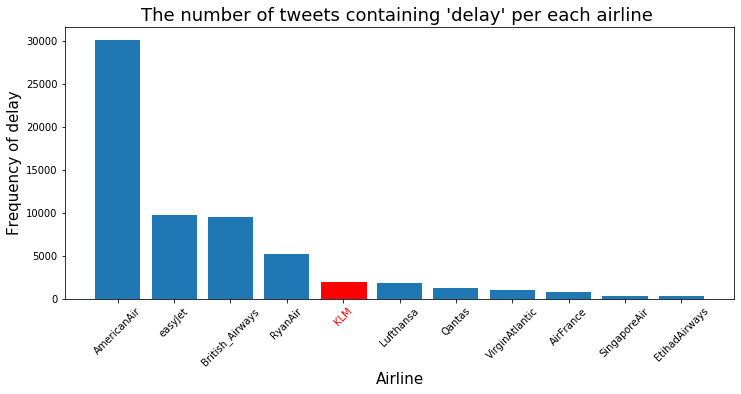

In [12]:
# Bar graph of absolute volumn

airline_sorted = a.sort_values('Frequency of delay', ascending=False)
airline_sorted

fig, ax = plt.subplots(figsize=(12,5))
bar = plt.bar(airline_sorted['Airline'], airline_sorted['Frequency of delay'])
plt.xlabel("Airline", size=15)
plt.ylabel('Frequency of delay', size=15)
plt.xticks(rotation='45')
ax.get_xticklabels()[4].set_color('red')
plt.title("The number of tweets containing 'delay' per each airline ", size=18)
bar[4].set_color("red")


plt.savefig('volumn plot.png', bbox_inches = 'tight')

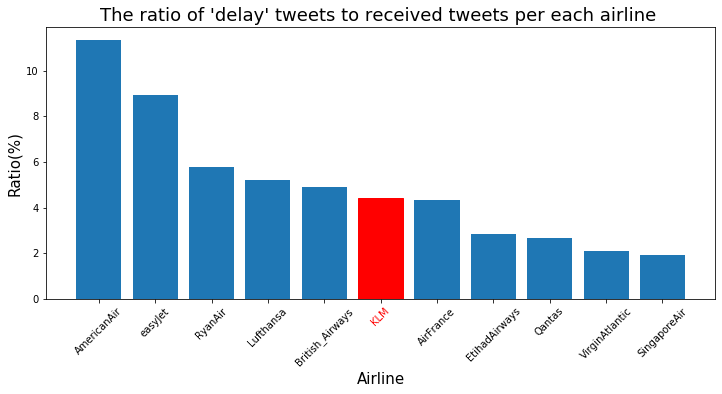

In [13]:
fig, ax = plt.subplots(figsize=(12,5))
bar = plt.bar(a['Airline'], a['Ratio']*100)
plt.xlabel("Airline", size=15)
plt.ylabel('Ratio(%)', size=15)
plt.xticks(rotation='45')
ax.get_xticklabels()[5].set_color('red')
plt.title("The ratio of 'delay' tweets to received tweets per each airline ", size=18)
bar[5].set_color("red")
plt.savefig('ratio plot.png', bbox_inches = 'tight')

## World frequency Analysis using sample proportion

In [14]:
# Get 50 samples to contain '@airline_name' and 'delay' 
data[(data['text'].str.contains('|'.join(airline_names),case=False)) & (data['text'].str.contains('delay',case=False))][['text']].sample(n = 50)

,text
491042,"@easyJet @EZY8840 no communication with airport about situation with delay promising a hotel room for everyone but only offering a Burger King at 3am this morning, poor customer service in fact absolutely disgusted with the way we are being treated!"
438416,Hey @AmericanAir you can stop texting and emailing about my flight you canceled and rescheduled which too is already delayed 10 hours before its scheduled departure. Thanks to @Delta I’m Home already. Your such a cute little airline #americanairdoesntcare
1069558,"Every time I fly @AmericanAir my flight is delayed. That’s FOUR different planes. Trip to destination, trip to home, and repeat. Talk about unreliable."
653353,@AmericanAir Hey. My bags got delayed in Charlotte and I am also missing my laptop. I think when trying to coordinate everything for me and my mom that it got left behind on the plane. I would love any expedited help with this!
556670,"@JonBenjamin19 @British_Airways After an 11 hour delay, I think you’re entitled to having a hologram of your pet appear on the flight. Safe trip back home."
683035,"@crh_hornet @easyJet Hello, you may receive up to 600 Eur flight compensation if your flight was delayed 3 or more hours. Of course, if the reason for flight delay was not the weather. File your claim: https://t.co/vmg50N23rK"
704613,"Honesty is the best policy. According to the status board, our @easyjet flight is getting into Belfast at 21:18 (and that was already thoroughly delayed). As things stand it’s 21:13 and we’re still queuing to get on board. Doubt we’ll get there in five minutes!"
640765,How surprising when some people argue about bags when @Ryanair tells you at least four times during the check in and booking process about their bag policy. 💼 \n\nFlight is delayed because of a group of girls arguing with the boarding gate staff at AGP airport. #avgeeks 🧐
361132,"@Ryanair FR294 why were we told an hour ago “boarding shortly” to get everyone queuing, when actually we’re delayed. It’s boiling in the airport, people are tired, and there’s no explanation for the delay yet you want us to queue up? #fryanair 🤦🏼‍♀️"
46840,both my flights delayed cause the captain ain’t show up to work and idk where my luggage is LMAO fuck y’all @AmericanAir im flying spirit next time


# Result

<The definition of 'complaint'>\
Unambiguous expression to describe how customers are not satisfied with delay issue using sarcasm\
or negative words such as 'worst' or 'bad'.


1. From tweets containing 'delay' among received tweets\
-complaint(75%)\
-question or ask help regarding to delay issue(24%)\
-compliment(under 1%)


2. 95% Confidence Interval\
P = The proportion that tweets containing 'delay' refer to complaint\
n = 50\
0.75-1.64*(0.75*0.25/50)^(1/2) ≈ 0.63\
0.75+1.64*(0.75*0.25/50)^(1/2) ≈ 0.87\
0.63 ≤ P ≤ 0.87 (95% Confidence Interval)

## World frequency over time : case of KLM
Assumption : There must be peak months regarding to delay issues\
Method : Count the number of received tweets containing 'delay' per Month.

## Data preprocessing
1. Extract text that contains both @KLM and 'delay'
2. Count the number of received tweets containing 'delay' per Month.
2. Put the counted numbers to the new table

## Make results
Create the plot

## Assessment 
Inspect why certain months have more delay issues.

In [6]:
# Extract text that contains both @KLM and 'delay'
KLM_delay = data[(data['text'].str.contains('@klm',case=False)) & (data['text'].str.contains('delay',case=False))][['text','date']]
KLM_delay

,text,date
227,@KLM flight delayed from Copenhagen to Amsterdam meaning the connection flight to Bristol was missed. KLM staff told us to book a hotel &amp; that website would update with a new flight automatically - which has not happened. 1/2,2020-02-21
903,@KLM_UK Thank you. I do not understand how it could be taking so long. Apparently my luggage arrived in London yesterday!!! How could it be SO delayed? I have medication packed that I need to take daily. And the only shoes I have with me blistered me feet. This is ridiculous. #KLM,2019-05-26
1332,"As I left my hotel I got an email saying my KLM leg was delayed slightly, but would still make the connection. At the airport, I still had no gate/time update on the @delta mobile app. No bags to check, so @KLM sent me thru security. 3/6",2019-05-25
1365,"Delay leaving FCO. \n\nBut it's on @KLM so they told us immediately, explained in detail, gave estimated times, then walked around to answer further questions and hand out spare water. \n\nUS carriers suuuuuck.",2019-05-25
3512,"These airlines don't respect the Montreal Convention. Delayed luggage for 8 days, refuse to pay for necessities of $185 @Avianca @KLM #worstairline #dontflyklm #lostbaggage #worstservice",2019-06-06
5312,My @KLM flight between SFO and AMS is delayed because the crew are stuck in traffic. I will now likely miss my 60 minute connection in AMS. Not fun after a 10 hour night flight,2019-06-08
5694,Hi @KLM First of all - we were looked after VERY well after we missed our connecting due to delays yesterday by a lady in the crown lounge. My bag didn’t make it onto the rearranged flight (different airport)- which form do I need to arrange for it’s delivery? :) Thanks.,2019-06-08
6206,"@KLM Thank you. But that's not enough. If my flight is delayed more than 3 hours, you must advise I'm entitled to assistance AND compensation. Not just say ""download the brochure"".",2019-06-08
6378,@KLM as a frequent flyer with yourselves I have noticed your service has been very bad of late. Multiple delays recently whereas there was none prior. Hope you buck up your ideas pronto.,2019-06-08
6496,"@KLM hello, could you help me please? My flight to Amsterdam from Tokyo has been delayed, meaning we miss our connection to Edinburgh. Can you please confirm that we’ve been booked onto a new connecting flight and also what time that new flight is at? Thanks!",2019-06-08


In [38]:
# Count the number of received tweets containing 'delay' per Month.
delay_per_month = KLM_delay['date'].value_counts().to_frame()
delay_per_month.sort_index(inplace=True)
delay_per_month.shape

(274, 1)

Text(0.5, 1.0, 'Word Frequency over time(KLM) ')

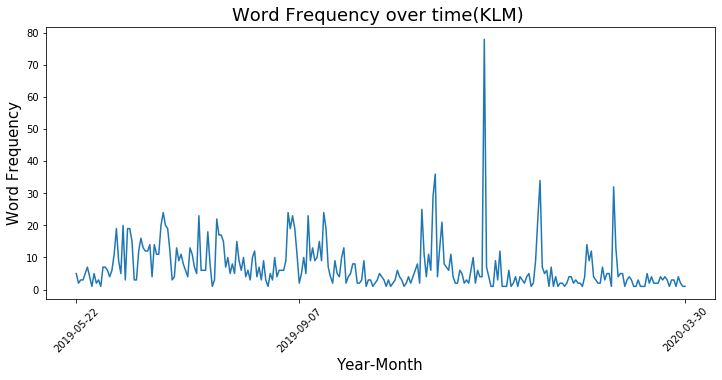

In [42]:
# Make plot
date = ['2019-05','2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12','2020-01','2020-02','2020-03']

plt.figure(figsize=(12,5))
plt.plot( delay_per_month['date'])
plt.xlabel("Year-Month", size=15)
plt.ylabel('Word Frequency', size=15)
plt.xticks([0,100,273],rotation='45')
plt.title("Word Frequency over time(KLM) ", size=18)




In [ ]:
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)